### 라이브러리 호출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

sns.set(style='darkgrid')  # grid 배경 어둡게

### 데이터 불러오기 

In [2]:
path = 'C:/Users/병현/Desktop/kaggle/타이타닉191224/'

df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')
submit = pd.read_csv(path + 'submit.csv', index_col = 0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 전체 생존률 확인 

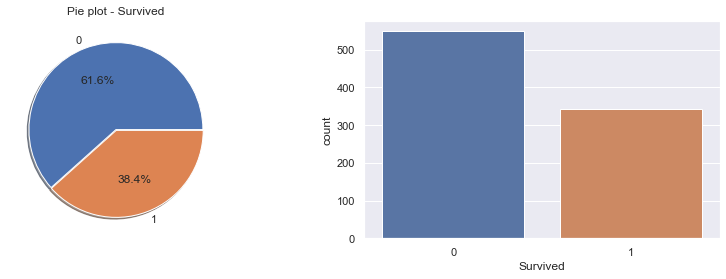

In [3]:
f, ax = plt.subplots(nrows = 1, ncols=2, figsize = (14,4))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.01],
                                            autopct = '%1.1f%%' ,ax=ax[0],shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax = ax[1])
plt.show()

>- 전체 인원중 생존률은 38.4%

### info를 통해 전반적인 데이터 탐색

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


>- Train : Age , Cabin ,Embarked 결측치 존재<br>
Test : Age, Fare , Cabin, Embarked 결측치 존재
>- Cabin에는 상당히 많은양의 결측치가 존재함

# 변수 순서대로 파악해볼것 . 맨처음 Pclass 

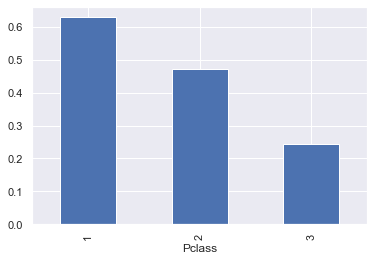

In [6]:
df_train.groupby('Pclass').mean()['Survived'].plot.bar()
plt.show()

>- Pclass가 1이면 생존률 확실히높음을 알 수 있다.

# Name 데이터에서 맨 앞 Title만 활용하기 

In [7]:
all_data = df_train.append(df_test, ignore_index=True)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


>- all_data :  train데이터와 test 데이터를 한번에 작업해주기 위해 만든 데이터프레임


In [8]:
for i in range(all_data.shape[0]):
    all_data.loc[i, 'Title'] = all_data['Name'].str.split(', ')[i][1].split('.')[0]
    
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


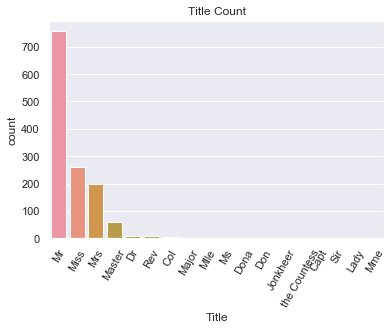

In [9]:
sns.countplot(x = 'Title', data = all_data,
             order = all_data['Title'].value_counts().index)
plt.xticks(rotation = 60)
plt.title('Title Count')
plt.show()

>- Title이 상당히 많으므로 , 세분화 해줄 필요가 있음

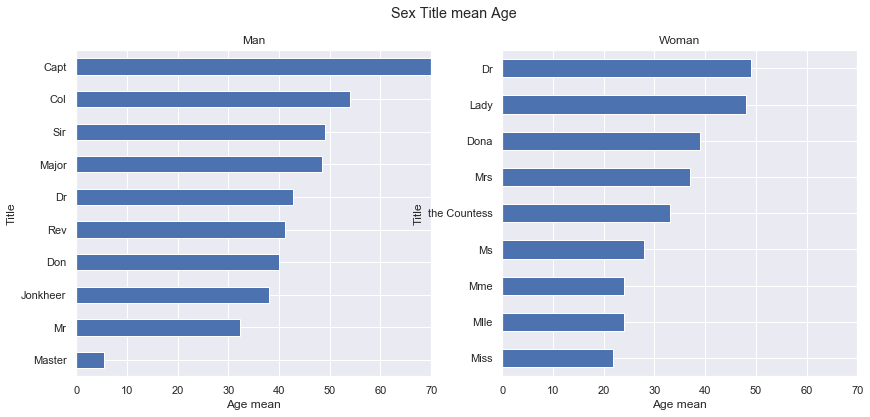

In [10]:
fig, ax = plt.subplots(1,2 , figsize = (14,6))

fig.suptitle('Sex Title mean Age')

all_data[all_data['Sex']=='male'].groupby('Title').mean()['Age'].sort_values().plot.barh(ax = ax[0])
ax[0].grid(True)
ax[0].set_title('Man')
ax[0].set_xlabel('Age mean')
ax[0].set_xlim(0, 70)

all_data[all_data['Sex']=='female'].groupby('Title').mean()['Age'].sort_values().plot.barh(ax = ax[1])
ax[1].grid(True)
ax[1].set_title('Woman')
ax[1].set_xlabel('Age mean')
ax[1].set_xlim(0, 70)
plt.show()

## Title은 성별과 나이에 따라 나뉘어 진 것을 알 수 있다 .
- 남자
    - 매우 어린 남자아이들 : Master
    - 청소년 포함 , 청년들 : Mr
    - Master , Mr 제외한 Title은 수가 적으므로 , 같이 묶어두기로 함.
    
- 여자
    - 결혼하지 않은 여자  : Miss
    - 결혼한 여자 : Mrs
    - Miss , Mrs 제외한 나머지 Title도 수가 적으므로 , 같이 묶어두기로 함

In [11]:
for i in range(all_data.shape[0]):
    if ((all_data.loc[i, 'Sex'] =='male') & (all_data.loc[i,'Title']!='Mr' ) & ( all_data.loc[i,'Title']!='Master') ):
        all_data.loc[i, 'Title'] = 'Man Rare'
    
    if ((all_data.loc[i, 'Sex'] =='female') & (all_data.loc[i,'Title']!='Mrs' ) & ( all_data.loc[i,'Title']!='Miss') ):
        all_data.loc[i, 'Title'] = 'Woman Rare'

all_data['Title'].value_counts()

Mr            757
Miss          260
Mrs           197
Master         61
Man Rare       25
Woman Rare      9
Name: Title, dtype: int64

>- 성별과 Title 변수는 남자 : (Master , Mr, Man Rare) , 여자 : (Miss , Mrs , Woman Rare) 6가지로 해결

In [12]:
df_train['Title'] = all_data.loc[:890, 'Title'].values
df_test['Title'] = all_data.loc[891:, 'Title'].values

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Woman Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


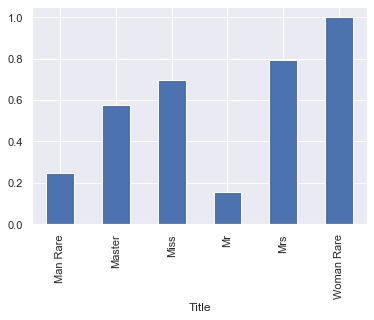

In [13]:
df_train.groupby('Title').mean()['Survived'].plot.bar()
plt.show()

# <center>성별 Sex

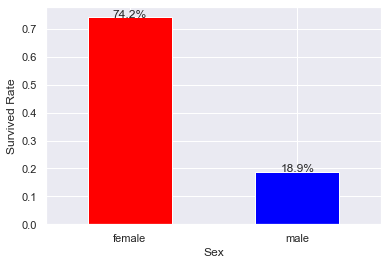

In [14]:
ax = df_train.groupby('Sex').mean()['Survived'].plot.bar(color = ['red','blue'])
ax.set_ylabel('Survived Rate')
ax.tick_params(rotation=0)   

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f%%"%(height * 100) , (left+width/2, height), ha='center')

plt.show()

- 생존률
    - Female : 74.2 %
    - Male : 18.9 %

# <center>Age (결측치 해결 필요)

In [15]:
all_data['Age'].isna().sum()

263

>- all_data : df_train + df_test
>- train 데이터와 , test 데이터에 총 Age 결측치가 263개 존재

In [16]:
all_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


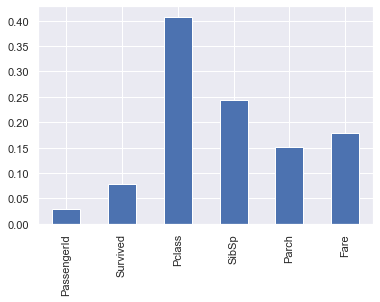

In [17]:
abs(all_data.corr()['Age'].drop('Age')).plot.bar()

>- Age의 결측치는 상관관계가 높은 값들을 이용해 채워줌
>- 상관관계의 크기만 보기 위해 절대값(abs) 사용
>- 그리고 위 plot에는 없지만 , 직관적으로 봐도 Title 변수가 가장 Age변수에 영향을 많이 끼칠것.
>- ### 그래서 , Title과 Pclass의 중간값으로 Age의 결측치를 채워주기로 함

In [18]:
all_data['Age'] = all_data.groupby(['Title','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

all_data['Age'].isna().sum()

1

>- 위 과정을 수행했는데 , 결측치가 아직도 존재함
>- 어떤데이터인지 확인해보고 , 적절한 값을 대치시켜줄것

In [19]:
all_data[(all_data['SibSp']==0) & (all_data['Parch']==0) & (all_data['Sex']=='female')]['Age'].mean()

28.16062176165803

In [20]:
all_data[all_data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Woman Rare


In [21]:
all_data.loc[all_data['Age'].isna(),'Age'] = \
                all_data[(all_data['SibSp']==0) & (all_data['Parch']==0) & (all_data['Sex']=='female')]['Age'].mean()

all_data['Age'].isna().sum()

0

In [22]:
all_data['Age'] = all_data['Age'].astype(int)

df_train['Age'] = all_data.loc[:890,'Age'].values
df_test['Age'] = all_data.loc[891:, 'Age'].values

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr


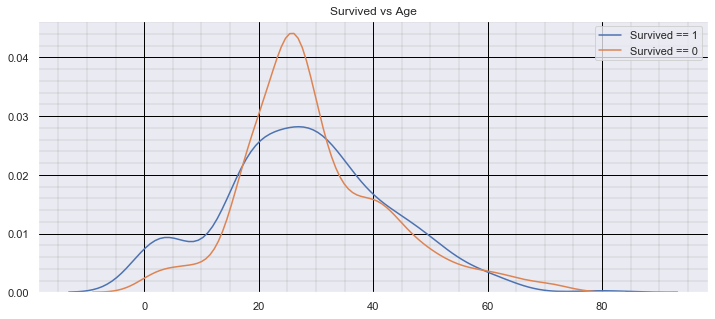

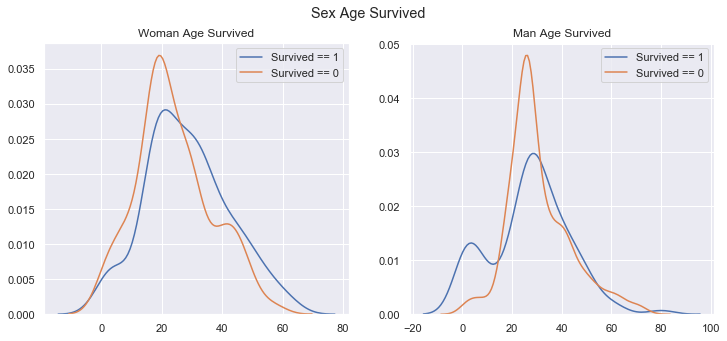

In [23]:
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']

fig, ax = plt.subplots(1,1, figsize = (12,5))
ax.set_title('Survived vs Age')
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'] ,  ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'] ,  ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])

ax.set_axisbelow(True)
ax.minorticks_on()

ax.grid(which='major', linestyle='-', linewidth='1', color='black')
ax.grid(which='minor', linestyle='-', linewidth='0.1', color='black')

###################ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ################

fig, ax = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Sex Age Survived')

ax[0].set_title('Woman Age Survived')
sns.kdeplot(women[women['Survived'] == 1]['Age'] ,  ax = ax[0])
sns.kdeplot(women[women['Survived'] == 0]['Age'] ,  ax = ax[0])
ax[0].legend(['Survived == 1', 'Survived == 0'])
ax[0].grid(True)



ax[1].set_title('Man Age Survived')
sns.kdeplot(men[men['Survived'] == 1]['Age'] ,  ax = ax[1])
sns.kdeplot(men[men['Survived'] == 0]['Age'] ,  ax = ax[1])
ax[1].legend(['Survived == 1', 'Survived == 0'])
ax[1].grid(True)
plt.show()

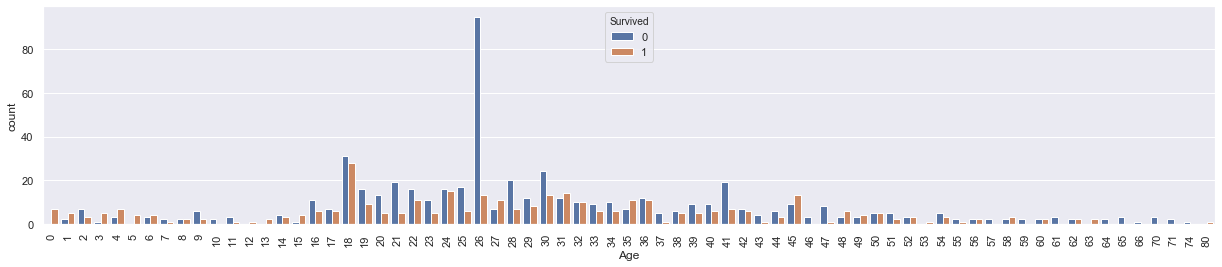

In [24]:
plt.figure(figsize = (21,4))
sns.countplot('Age', hue = 'Survived', data = df_train)
plt.xticks(rotation = 90)

plt.show()

>- Age가 0일때 , 즉 갓난아기인 경우에는 무조건 생존했음을 볼 수 있다. 
>- 나이가 어리다고 무조건 생존률이 높은것은 아니라고 생각이 된다.
>- 2세 , 9세,  11세만 보면 오히려 생존률이 매우 낮음을 볼 수 있다 . 
>- 그래서 , 0세일때를 제외하고는 나이가 유의미한 변수라 생각하지 않음.
>- 의미가 있다해도 Title이라는 변수로 해결가능하다 생각함.
>- ### Age ==0이면 infant라는 변수를 새로 생성해준 후, Age는 drop시킬것

In [25]:
df_train.loc[df_train['Age']<1 , 'infant'] = 1
df_train.loc[df_train['Age']>=1 , 'infant'] = 0

df_test.loc[df_test['Age']<1 , 'infant'] = 1
df_test.loc[df_test['Age']>=1, 'infant'] = 0

df_train.drop('Age',axis= 1, inplace = True)
df_test.drop('Age',axis= 1, inplace = True)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,infant
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Mrs,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Mrs,0.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Mr,0.0


# SibSp

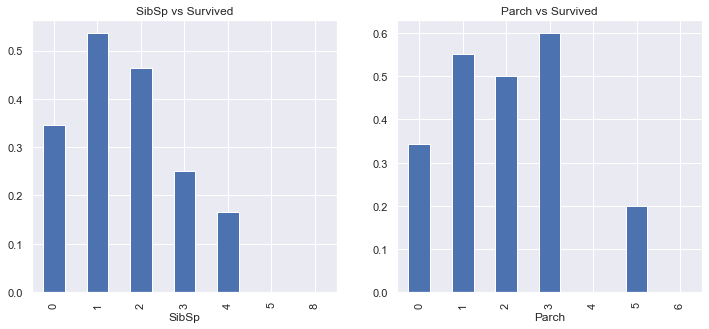

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df_train.groupby('SibSp').mean()['Survived'].plot.bar()
plt.title('SibSp vs Survived')


plt.subplot(1,2,2)
df_train.groupby('Parch').mean()['Survived'].plot.bar()
plt.title('Parch vs Survived')

plt.show()

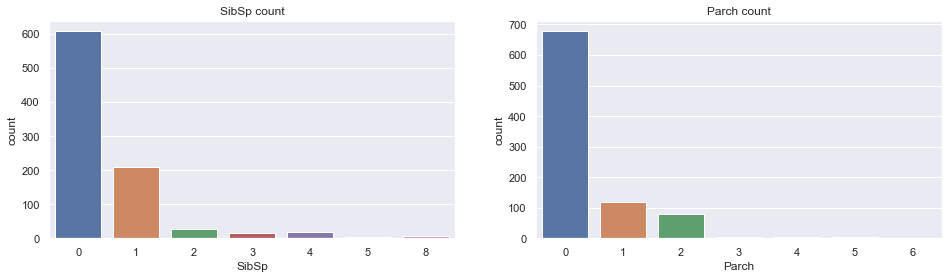

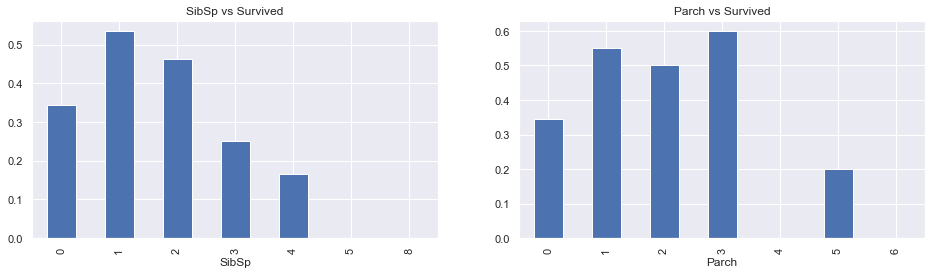

In [27]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.countplot(x ='SibSp', data = df_train)
plt.title('SibSp count')

plt.subplot(1,2,2)
sns.countplot(x ='Parch', data = df_train)
plt.title('Parch count')

plt.show()


#=========================================================

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
df_train.groupby('SibSp').mean()['Survived'].plot.bar()
plt.title('SibSp vs Survived')


plt.subplot(1,2,2)
df_train.groupby('Parch').mean()['Survived'].plot.bar()
plt.title('Parch vs Survived')

plt.show()

- SibSp : Sibling + Spouse  (자녀 수 + 배우자)
- Parch : Parent + Children

>- (SibSp + Parch)를 통해 FamilySize라는 변수로 만들어줌
>- SibSp와 Parch는 제거할지 , 그대로 학습모델에 넣을지는 많은 고민이 필요하다 생각됨

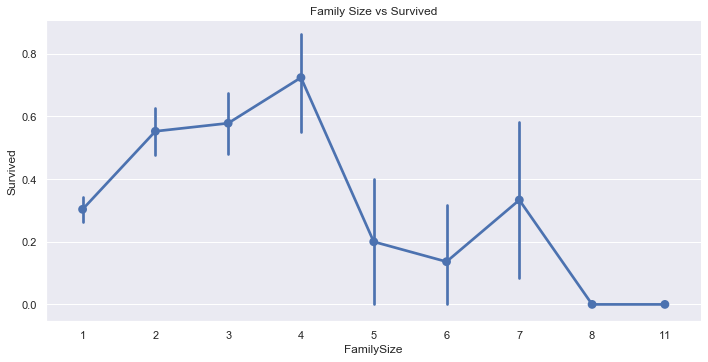

In [28]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # 본인포함 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1  # 본인포함 1

sns.catplot('FamilySize','Survived', 
                      data=df_train, aspect = 2, kind =  'point')
plt.title('Family Size vs Survived')
plt.show()

>- 가정 구성원 수가 많을수록 생존률이 낮음을 확인할 수 있다.

In [29]:
df_train['FamilySize'] = df_train['FamilySize'].astype(int)
df_test['FamilySize'] = df_test['FamilySize'].astype(int)


df_train.loc[df_train['FamilySize']>=5 , 'FamilySize'] = 'L'
df_train.loc[df_train['FamilySize']==1 , 'FamilySize'] = 'S'
df_train.loc[df_train['FamilySize']==2 , 'FamilySize'] = 'M'
df_train.loc[df_train['FamilySize']==3 , 'FamilySize'] = 'M'
df_train.loc[df_train['FamilySize']==4 , 'FamilySize'] = 'M'


df_test.loc[df_test['FamilySize']>=5 , 'FamilySize'] = 'L'
df_test.loc[df_test['FamilySize']==1 , 'FamilySize'] = 'S'
df_test.loc[df_test['FamilySize']==2 , 'FamilySize'] = 'M'
df_test.loc[df_test['FamilySize']==3 , 'FamilySize'] = 'M'
df_test.loc[df_test['FamilySize']==4 , 'FamilySize'] = 'M'

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,infant,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Mrs,0.0,M
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Mrs,0.0,M
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Mr,0.0,S


- 탑승한 가족 구성원 수(본인 포함)
    - 1명 : S
    - 2~4명 : M
    - 5명 이상 : L

# <center>Fare

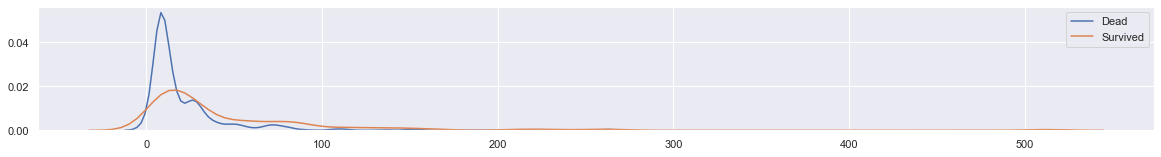

In [30]:
plt.figure(figsize=(20,5))

plt.subplot(2,1,1)
sns.kdeplot(df_train.loc[df_train['Survived']==0,'Fare'], label = 'Dead')
sns.kdeplot(df_train.loc[df_train['Survived']==1,'Fare'], label = 'Survived')
plt.legend()

plt.show()

>- 그래프의 skewness가 매우 큼을 볼 수 있다.
>- 이를 해결하기위해 log를 취해줄것

In [31]:
df_train['log_Fare'] = np.log1p(df_train['Fare'].values)
df_test['log_Fare'] = np.log1p(df_test['Fare'].values)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,infant,FamilySize,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0,M,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Mrs,0.0,M,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.0,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Mrs,0.0,M,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Mr,0.0,S,2.202765


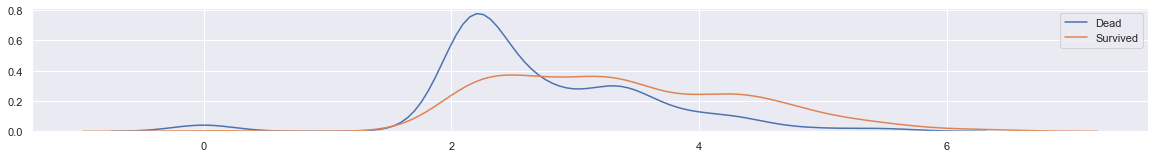

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(2,1,1)
sns.kdeplot(df_train.loc[df_train['Survived']==0,'log_Fare'], label = 'Dead')
sns.kdeplot(df_train.loc[df_train['Survived']==1,'log_Fare'], label = 'Survived')
plt.legend()

plt.show()

df_train.drop('Fare', axis =1 , inplace = True)  # log_fare라는 변수를 사용하기위해 , Fare변수 삭제
df_test.drop('Fare', axis =1 , inplace = True)

In [33]:
#그리고 test_df 에 결측치 하나 존재함
df_test[df_test['log_Fare'].isna()]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,infant,FamilySize,log_Fare
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,NaN,S,Mr,0.0,S,NaN


In [34]:
df_test.corr()['log_Fare']
# Fare은 Pclass와 가장 상관성이 큼.. 그래서 Pclass가 3 인 log_Fare의 평균값을 넣어줌

PassengerId    0.022032
Pclass        -0.738417
SibSp          0.302320
Parch          0.312222
infant        -0.020190
log_Fare       1.000000
Name: log_Fare, dtype: float64

In [35]:
df_test['log_Fare'] = df_test['log_Fare'].fillna(df_test[df_test['Pclass']==3].mean()['log_Fare'])
df_test.isna().sum()

#결측치 해결

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Cabin          327
Embarked         0
Title            0
infant           0
FamilySize       0
log_Fare         0
dtype: int64

# <center>Embarked

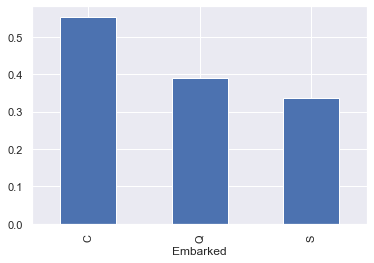

In [36]:
df_train.groupby('Embarked').mean()['Survived'].plot.bar()

plt.show()

>- Embarked별로 생존률 차이가 있지만 큰 차이는 없음.
>- 그래서 Drop 시키는게 나을수도 있다고 생각함.
>- Kaggle에서 찾아보니 , 고득점자들의 경우 대부분 버리는것을 확인

# 결측치 처리

In [37]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Cabin          687
Embarked         2
Title            0
infant           0
FamilySize       0
log_Fare         0
dtype: int64

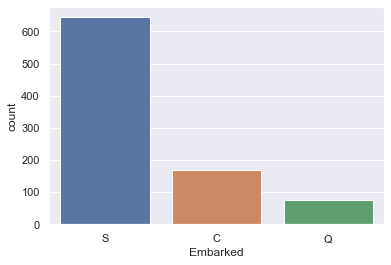

In [38]:
sns.countplot(x = 'Embarked', data = df_train)
plt.show()

df_train['Embarked'] = df_train['Embarked'].fillna('S')

>- Embarked 결측치는 고작 2개이고 , 대부분값이 S이므로 , S로 결측치 대체해줌

# Ticket

In [39]:
all_data['Ticket'].head(8)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
Name: Ticket, dtype: object

>- Ticket 변수 값의 맨 앞에 문자만 갖고 비교하기로 함. 
>- 문자가 없이 숫자만 존재하는 값에는 X로 대체

In [40]:
Ticket = []
for i in list(all_data['Ticket']):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
all_data["Ticket"] = Ticket

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A5,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,X,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,X,8.0500,NaN,S,Mr


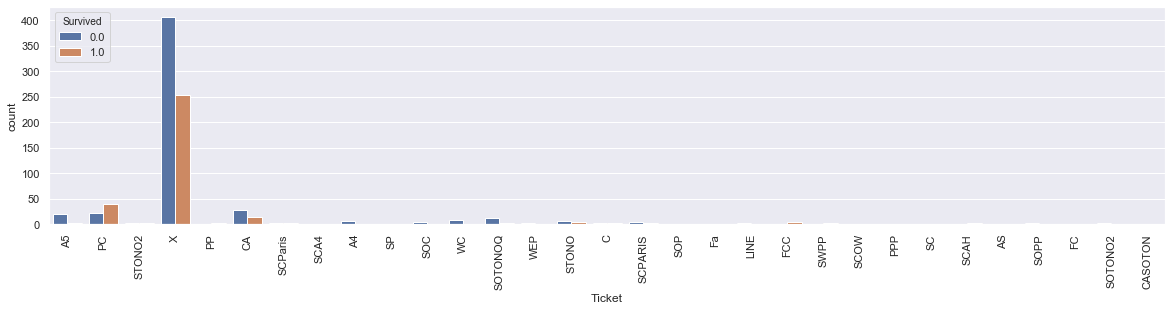

In [41]:
plt.figure(figsize = (20,4))
sns.countplot(x = 'Ticket', data = all_data[:890], hue='Survived')  #train데이터만 Survived존재하므로 .
plt.xticks(rotation = 90)
plt.show()

In [42]:
all_data.groupby('Ticket').count()['PassengerId'][all_data.groupby('Ticket').count()['PassengerId']>=20]



Ticket
A5          28
CA          68
PC          92
SOTONOQ     24
X          957
Name: PassengerId, dtype: int64

>- Ticket의 count수가 20개 미만인것은 Rare_Ticket이라는 변수로 묶어두기로 함
>- 위 그래프에서 볼 수 있듯이 , Ticket의 종류는 너무 많아서 (A5, CA, PC , SOTONOQ, X, Rare_Ticket) 6가지로만 나누려고 함

In [43]:
Ticket_list = ['A5','CA','PC','SOTONOQ','X']

In [44]:
for i in range(all_data.shape[0]):
    if(all_data.loc[i , 'Ticket'] not in Ticket_list):
        all_data.loc[i, 'Ticket'] = 'Rare_Ticket'

In [45]:
df_train['Ticket'] = all_data.loc[:890,'Ticket'].values
df_test['Ticket'] = all_data.loc[891:,'Ticket'].values

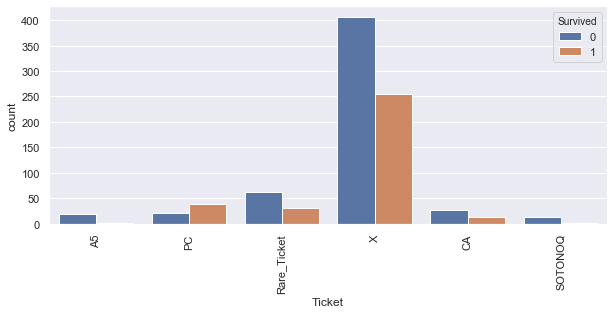

In [46]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'Ticket', data = df_train, hue='Survived')
plt.xticks(rotation = 90)
plt.show()

# <center>Cabin 

In [47]:
print('Cabin데이터의 결측치 : ' , np.round(all_data['Cabin'].isna().sum() / len(all_data),3))

Cabin데이터의 결측치 :  0.775


>- 무려 77.5 % 가 결측치임을 확인할 수 있다.
>- 그래서 결측치만 존재하는 df_train_Not_Cabin , 결측치가 아닌 값들이 존재하는 df_train_Cabin 두가지로 나눠서 분석

In [48]:
df_train_Cabin = df_train[df_train['Cabin'].notna()]

df_train_Not_Cabin = df_train[df_train['Cabin'].isna()]

df_train_Cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,infant,FamilySize,log_Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC,C85,C,Mrs,0.0,M,4.280593
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,X,C123,S,Mrs,0.0,M,3.990834
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,X,E46,S,Mr,0.0,S,3.967694
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,1,1,Rare_Ticket,G6,S,Miss,0.0,M,2.873565
11,12,1,1,"Bonnell, Miss. Elizabeth",female,0,0,X,C103,S,Miss,0.0,S,3.316003


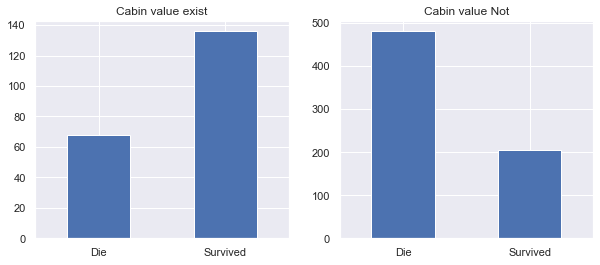

In [49]:
fig , ax = plt.subplots(1,2 , figsize = (10,4))

df_train_Cabin['Survived'].value_counts(sort = False).plot.bar(ax = ax[0])

ax[0].set_title('Cabin value exist')
ax[0].set_xticklabels(['Die','Survived'] , rotation =0)

df_train_Not_Cabin['Survived'].value_counts(sort = False).plot.bar(ax = ax[1])
ax[1].set_title('Cabin value Not')
ax[1].set_xticklabels(['Die','Survived'] , rotation =0)

plt.show()

>- Cabin값이 비어있을경우 생존가능성이 더 높음을 알 수 있음
>- 나머지 Cabin이 존재하는 경우 , 그 Cabin값이 어떤 의미를 가지는지 Cabin의 맨 앞글자만을 이용하여 분석해보기로함


In [50]:
all_data['Cabin'] = all_data['Cabin'].str[0].values
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A5,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC,71.2833,C,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,Rare_Ticket,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,X,53.1000,C,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,X,8.0500,NaN,S,Mr


In [51]:
all_data['Cabin'] = all_data['Cabin'].apply(lambda x : 'X' if (x is np.NaN) else x)
# 결측치이면 X로 대체

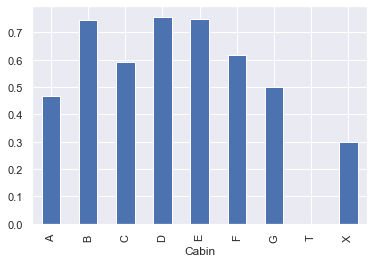

In [52]:
all_data.loc[:890].groupby('Cabin').mean()['Survived'].plot.bar()
plt.show()

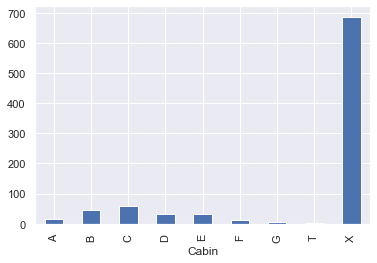

In [53]:
all_data.loc[:890].groupby('Cabin').count()['Survived'].plot.bar()
plt.show()

>- Cabin이 결측치가 아닌 값들은 그 Cabin변수의 맨 앞자리는 (A , B, C, D , E, F, G, T ) 총 8가지로 나뉨
>- 하지만 표본의 개수가 매우 적고 , Cabin값 별로 생존률에 차이도 크지 않음

### 따라서 , Cabin은 NaN값인지 , 아닌지 만으로 분석하기로 함

In [54]:
all_data['Cabin'] = all_data['Cabin'].apply(lambda x : 'O' if x != 'X' else x)

# NaN이면 X , NaN이 아니였으면 O를 넣어줌

In [55]:
df_train['Cabin'] = all_data.loc[:890, 'Cabin'].values
df_test['Cabin'] = all_data.loc[891:,'Cabin'].values

# 이제 필요없는 변수들 삭제 

In [56]:
df_train.info()
#결측치 모두 해결됨을 볼 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    object 
 11  infant       891 non-null    float64
 12  FamilySize   891 non-null    object 
 13  log_Fare     891 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [57]:
# PassengerId , Name , Sex, Parch제거해줄것

del_index = ['PassengerId' , 'Name'  ,  'Sex'  ,'Parch', 'Embarked']

In [58]:
df_train.drop(del_index, axis = 1 , inplace = True)
df_test.drop(del_index, axis = 1 , inplace = True)
df_train.head()

,Survived,Pclass,SibSp,Ticket,Cabin,Title,infant,FamilySize,log_Fare
0,0,3,1,A5,X,Mr,0.0,M,2.110213
1,1,1,1,PC,O,Mrs,0.0,M,4.280593
2,1,3,0,Rare_Ticket,X,Miss,0.0,S,2.188856
3,1,1,1,X,O,Mrs,0.0,M,3.990834
4,0,3,0,X,X,Mr,0.0,S,2.202765


# 변수를 one-hot encoding 시켜줘야함 

In [59]:
from sklearn.preprocessing import OneHotEncoder
OneHot = OneHotEncoder()

In [60]:
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['FamilySize'] = df_train['FamilySize'].astype('category')
df_train['Ticket'] = df_train['Ticket'].astype('category')
df_train['Cabin'] = df_train['Cabin'].astype('category')


df_test['Pclass'] = df_test['Pclass'].astype('category')
df_test['FamilySize'] = df_test['FamilySize'].astype('category')
df_test['Ticket'] = df_test['Ticket'].astype('category')
df_test['Cabin'] = df_test['Cabin'].astype('category')

df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

df_train.head()

,Survived,SibSp,infant,log_Fare,Pclass_1,Pclass_2,Pclass_3,Ticket_A5,Ticket_CA,Ticket_PC,...,Cabin_X,Title_Man Rare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Woman Rare,FamilySize_L,FamilySize_M,FamilySize_S
0,0,1,0.0,2.110213,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,1,0.0,4.280593,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0.0,2.188856,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0.0,3.990834,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0.0,2.202765,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [61]:
train_X = df_train.drop('Survived', axis = 1)
train_y = df_train['Survived']


print(train_X.shape, train_y.shape, df_test.shape)

(891, 23) (891,) (418, 23)


In [82]:
train_X.columns

Index(['SibSp', 'infant', 'log_Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Ticket_A5', 'Ticket_CA', 'Ticket_PC', 'Ticket_Rare_Ticket',
       'Ticket_SOTONOQ', 'Ticket_X', 'Cabin_O', 'Cabin_X', 'Title_Man Rare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Woman Rare', 'FamilySize_L', 'FamilySize_M', 'FamilySize_S'],
      dtype='object')

# 머신러닝 

### VotingClassifier를 이용함

이것은 여러가지의 Classifier들을 사용해보고 , 그 중에서
가장 좋은 모델을 알아서 투표해서 사용하도록 하는 모델임

참고로 저도 아래 과정은 Kaggle 에서 공유된 코드를 거의 그대로 사용하였습니다.

In [62]:
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import cluster, datasets, mixture
from sklearn.metrics import accuracy_score,recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived',axis=1), df_train['Survived'],
                                                    test_size=0.2, random_state=42)

#학습용 데이터를 분할시킴

In [64]:
Scores = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived',axis=1), df_train['Survived'],
                                                    test_size=0.20, random_state=42)

xgboost = XGBClassifier(learning_rate=0.01, n_estimators=4060,gamma=0.0482,
                                     max_depth=4, min_child_weight=0,
                                     subsample=0.7,colsample_bytree=0.7,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006,random_state=42)

#파라미터 값은 캐글값에서 그대로 긁어온거라 구체적으로 의미하는 바는 잘 모르겠음
#Randomsearchcv  ?? 로 구해진 변수값이라 생각함 .


xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)

score = pd.DataFrame({"Model":['XGBClassifier'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)


In [66]:
RFmodel = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 500]}, cv=10).fit(X_train,y_train)
RFmodel.fit(X_train,y_train)
y_pred = RFmodel.predict(X_test)

score = pd.DataFrame({"Model":['RFmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)
Scores

,Model,Accuracy Score,Recall,F1score
0,XGBClassifier,0.832402,0.770270,0.791667
0,RFmodel,0.810056,0.797297,0.776316


In [67]:
DTmodel = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'max_depth' : np.arange(2, 9, dtype=int),
              'min_samples_leaf' :  np.arange(1, 3, dtype=int)}, cv=10).fit(X_train,y_train)
DTmodel.fit(X_train,y_train)
y_pred = DTmodel.predict(X_test)

score = pd.DataFrame({"Model":['DTmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

In [68]:
Scores

,Model,Accuracy Score,Recall,F1score
0,XGBClassifier,0.832402,0.770270,0.791667
0,RFmodel,0.810056,0.797297,0.776316
0,DTmodel,0.821229,0.743243,0.774648


In [69]:
KNmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 10]}, cv=10).fit(X_train,y_train)

KNmodel.fit(X_train,y_train)
y_pred = KNmodel.predict(X_test)

score = pd.DataFrame({"Model":['KNmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)


In [70]:
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

y_pred = logmodel.predict(X_test)

score = pd.DataFrame({"Model":['logmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

In [71]:
Scores

,Model,Accuracy Score,Recall,F1score
0,XGBClassifier,0.832402,0.770270,0.791667
0,RFmodel,0.810056,0.797297,0.776316
0,DTmodel,0.821229,0.743243,0.774648
0,KNmodel,0.793296,0.621622,0.713178
0,logmodel,0.815642,0.743243,0.769231


In [72]:
SVCmodel= SVC(probability=True)
SVCmodel.fit(X_train,y_train)

y_pred = SVCmodel.predict(X_test)

score = pd.DataFrame({"Model":['SVCmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

In [73]:
Scores

,Model,Accuracy Score,Recall,F1score
0,XGBClassifier,0.832402,0.770270,0.791667
0,RFmodel,0.810056,0.797297,0.776316
0,DTmodel,0.821229,0.743243,0.774648
0,KNmodel,0.793296,0.621622,0.713178
0,logmodel,0.815642,0.743243,0.769231
0,SVCmodel,0.826816,0.756757,0.783217


In [74]:
vot_classifier = VotingClassifier(estimators=[('xg', xgboost),('log', logmodel), ('rf', RFmodel),\
                                              ('dt', DTmodel), ('svc', SVCmodel)], voting='soft', n_jobs=4)

vot_classifier=vot_classifier.fit(X_train, y_train)

y_pred = vot_classifier.predict(X_test)

score = pd.DataFrame({"Model":['vot_classifier'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)
vot_classifier=vot_classifier.fit(X_train, y_train)

In [75]:
submit['Survived'] = vot_classifier.predict(df_test)
submit.to_csv('Voting.csv')
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [76]:
df_test.columns

Index(['SibSp', 'infant', 'log_Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Ticket_A5', 'Ticket_CA', 'Ticket_PC', 'Ticket_Rare_Ticket',
       'Ticket_SOTONOQ', 'Ticket_X', 'Cabin_O', 'Cabin_X', 'Title_Man Rare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Woman Rare', 'FamilySize_L', 'FamilySize_M', 'FamilySize_S'],
      dtype='object')

# 제출시 80.3%의 정확도를 얻었습니다.

### https://www.kaggle.com/c/titanic